# **ТИП ТОПЛИВА И ОБЬЕМ ДВИГАТЕЛЯ. ЛИНЕЙНАЯ МОДЕЛЬ**

In [2]:
processed_df = pd.read_csv('processed_df.csv')

In [3]:
processed_df.columns

Index(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan',
       'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'year', 'selling_price',
       'km_driven', 'Diesel', 'Individual', 'Dealer', 'Manual', 'First Owner',
       'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'milage',
       'engine', 'max_power', 'torque', 'RPM_min', 'seats'],
      dtype='object')

**ВЫБОР ДВУХ ПРИЗНАКОВ- ТИП ТОПЛИВА И ОБЬЕМ ДВИГАТЕЛЯ**

In [4]:
processed_df = processed_df.loc[:, ['Diesel', 'engine', 'selling_price']].dropna()

**НОРМАЛИЗУЕМ ПРИЗНАКИ ПО СРЕДСТВАМ SNADART SCALLER**

In [5]:
scaler = StandardScaler()
x = scaler.fit_transform(processed_df.loc[:, ['Diesel', 'engine']])
y = scaler.fit_transform(processed_df[['selling_price']])

**ДЛЯ НАЧАЛА ПОПРОБУЕМ ОБУЧИТЬ НА ПРИМЕРЕ ОДНОЙ СТЕПЕНИ ПОЛИНОМА**

In [6]:
poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(x)
x_poly

array([[ 1.        ,  0.90175469, -0.42334643,  0.81316153, -0.38175463,
         0.1792222 ],
       [ 1.        ,  0.90175469,  0.07346712,  0.81316153,  0.06624932,
         0.00539742],
       [ 1.        , -1.10894904,  0.07147987,  1.22976797, -0.07926753,
         0.00510937],
       ...,
       [ 1.        ,  0.90175469, -0.42334643,  0.81316153, -0.38175463,
         0.1792222 ],
       [ 1.        ,  0.90175469, -0.12923281,  0.81316153, -0.11653629,
         0.01670112],
       [ 1.        ,  0.90175469, -0.12923281,  0.81316153, -0.11653629,
         0.01670112]])

In [7]:
x

array([[ 0.90175469, -0.42334643],
       [ 0.90175469,  0.07346712],
       [-1.10894904,  0.07147987],
       ...,
       [ 0.90175469, -0.42334643],
       [ 0.90175469, -0.12923281],
       [ 0.90175469, -0.12923281]])

In [8]:
reg_1 = LinearRegression(fit_intercept=False)
cv_results = cross_validate(reg_1, x_poly, y, cv=5, return_train_score=True, scoring='neg_mean_absolute_percentage_error')
print(cv_results['test_score'])
print(cv_results['train_score'])

[-4.49281002 -6.43596159 -6.20514659 -4.04451589 -5.43108799]
[-5.53962369 -5.1543262  -4.97827013 -5.73995989 -5.34407916]


**ЗАВИСИМОСТЬ СТЕПЕНИ ПОЛИНОМА ОТ ПОТЕРЬ**

**1. СОЗДАДИМ СПИСОК СТЕПЕНЕЙ ПОЛИНОМА**

In [9]:
poly_power = np.arange(1, 30, 1)
poly_power

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

**СОЗДАДИМ ДФ В КОТОРЫЙ БУДЕМ ЗАПИСЫВАТЬ РЕЗУЛЬТАТЫ**

**ЦИКЛ С ПЕРЕБОРОМ СТЕПЕНЕЙ ПОЛИНОМА. ПОТЕРИ- MAE**

In [10]:
poly_loss_df = pd.DataFrame({'poly': [], 'loss_train': [], 'loss_test': []})
for p in poly_power:
    # генерация признаков с полиномом степени p
    polynom = PolynomialFeatures(p)
    x_poly = polynom.fit_transform(x)
    # оздание обьекта линейной модели обучения. fit_intercept=False для того, что бы модель не добавляла единичный столбец к матрице признаков для свободного коэффициента w
    reg = LinearRegression(fit_intercept=False)
    # применяем кросс-валидацию для поиска потерь
    cv_results = cross_validate(reg, x_poly, y, cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
    # записываем стредние потери для тестовых и тренировочных датасетов в датафрейм
    poly_loss_df.loc[len(poly_loss_df.index)] = [p, np.mean(np.array(cv_results['train_score'])), np.mean(np.array(cv_results['test_score']))]
poly_loss_df

,poly,loss_train,loss_test
0,1.0,-0.458737,-0.458973
1,2.0,-0.462542,-0.463039
2,3.0,-0.458158,-0.458774
3,4.0,-0.474137,-0.474984
4,5.0,-0.440519,-0.442573
5,6.0,-0.436600,-0.439294
6,7.0,-0.412044,-0.414992
7,8.0,-0.415840,-0.421187
8,9.0,-0.391272,-0.393882
9,10.0,-0.387918,-0.416109


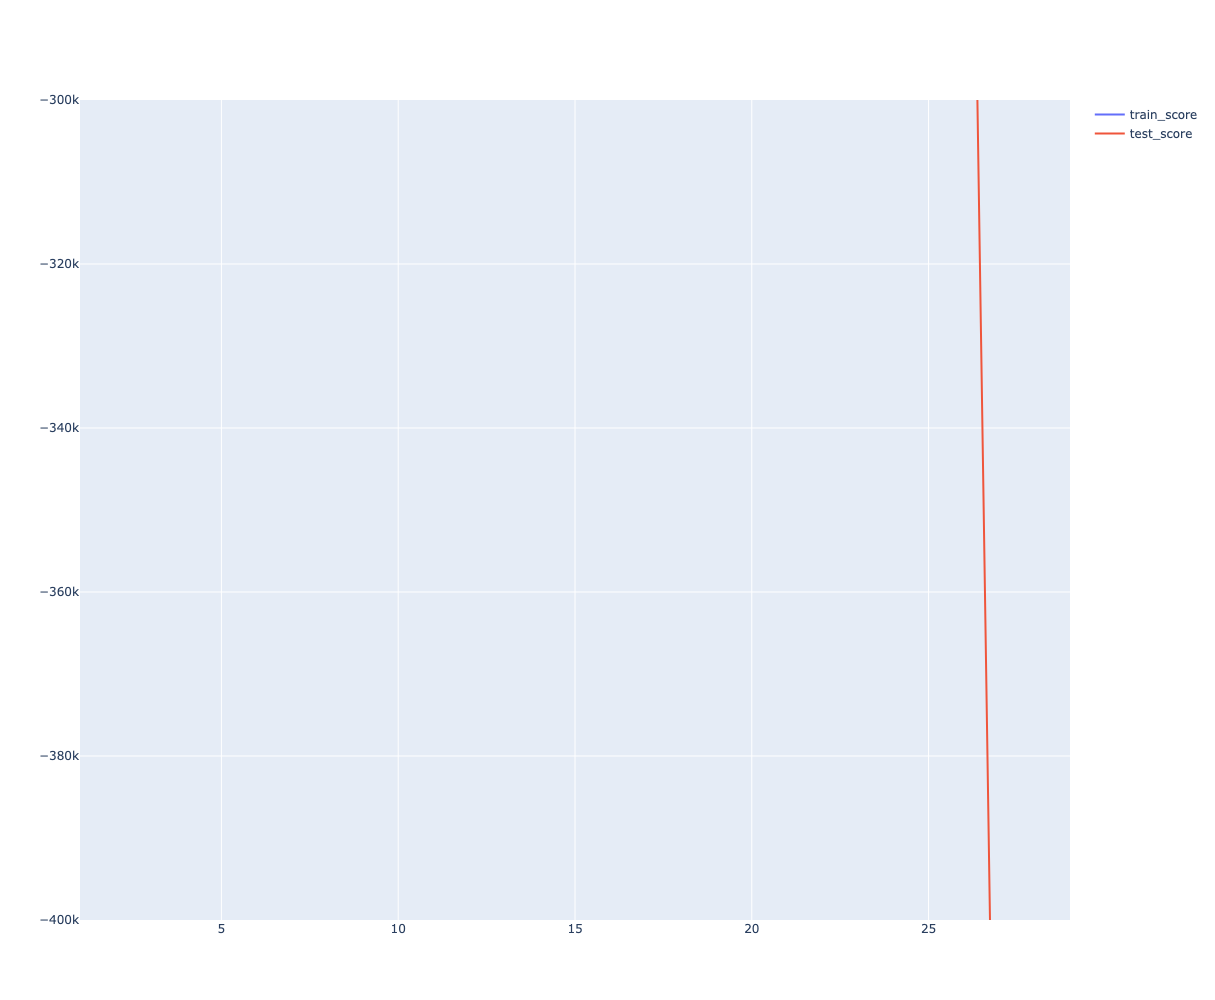

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=poly_loss_df['poly'], y=poly_loss_df['loss_train'], mode='lines', name='train_score'))
fig.add_trace(go.Scatter(x=poly_loss_df['poly'], y=poly_loss_df['loss_test'], mode='lines', name='test_score'))
fig.update_layout(width = 1400, height=1000, yaxis_range=[-1, 0])
#fig.write_html('ENGINE_VOL_DIESEL____loss_mae_test_VS_loss_mae_train.html')
fig.show()

**ПОТЕРИ MAPE**

In [12]:
poly_loss_df_mape = pd.DataFrame({'poly': [], 'loss_train': [], 'loss_test': []})
for p in poly_power:
    # генерация признаков с полиномом степени p
    polynom = PolynomialFeatures(p)
    x_poly = polynom.fit_transform(x)
    # оздание обьекта линейной модели обучения. fit_intercept=False для того, что бы модель не добавляла единичный столбец к матрице признаков для свободного коэффициента w
    reg = LinearRegression(fit_intercept=False)
    # применяем кросс-валидацию для поиска потерь
    cv_results = cross_validate(reg, x_poly, y, cv=5, return_train_score=True, scoring='neg_mean_absolute_percentage_error')
    # записываем стредние потери для тестовых и тренировочных датасетов в датафрейм
    poly_loss_df_mape.loc[len(poly_loss_df_mape.index)] = [p, np.mean(np.array(cv_results['train_score'])), np.mean(np.array(cv_results['test_score']))]
poly_loss_df_mape

,poly,loss_train,loss_test
0,1.0,-5.943648,-5.926391e+00
1,2.0,-5.351252,-5.321904e+00
2,3.0,-6.593983,-6.578638e+00
3,4.0,-7.929092,-7.942311e+00
4,5.0,-7.346960,-7.368775e+00
5,6.0,-7.159370,-7.200703e+00
6,7.0,-6.459485,-6.502923e+00
7,8.0,-6.771181,-6.806448e+00
8,9.0,-6.256315,-6.280167e+00
9,10.0,-6.013781,-6.042335e+00


In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=poly_loss_df_mape['poly'], y=poly_loss_df_mape['loss_train'], mode='lines', name='train_score'))
fig.add_trace(go.Scatter(x=poly_loss_df_mape['poly'], y=poly_loss_df_mape['loss_test'], mode='lines', name='test_score'))
fig.update_layout(width = 1200, height=1000, yaxis_range=[-1, -0.6])
fig.show()

**НА ОБОИХ ГРАФИКАХ ВИДНО, ЧТО НАИЛУЧШАЯ СТЕПЕНЬ ПОЛИНОМА ЯВЛЯЕТСЯ 9**

# **ТЯГА ОТ ТИПА ДВИГАТЕЛЯ**

In [14]:
processed_df = pd.read_csv('processed_df.csv')

In [15]:
processed_df = processed_df.loc[:, ['Diesel', 'max_power', 'selling_price']].dropna()

**СКАЛЯРИЗУЕМ ДАТАСЕТ**

In [16]:
st_scal = StandardScaler()
X = st_scal.fit_transform(processed_df.loc[:, ['Diesel', 'max_power']])
Y = st_scal.fit_transform(processed_df[['selling_price']])

**СОЗДАДИМ СПИСОК СТЕПЕНЕЙ ПОЛИНОМА**

In [17]:
power = np.arange(1, 31, 1)

**ПРОГОНИМ ОБУЧЕНИЕ ПОЛИНОМАМИ РАЗНЫХ СТЕМЕНЕЙ С МЕТРИКОЙ MAE**

In [18]:
power_dies_df = pd.DataFrame({'poly': [], 'loss_train': [], 'loss_test': []})
for each in power:
    poly2 = PolynomialFeatures(each)
    x_polynom = poly2.fit_transform(X)
    regr2 = LinearRegression(fit_intercept=False)
    cross_val = cross_validate(regr2, x_polynom, Y, cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
    power_dies_df.loc[len(power_dies_df.index)] = [each, np.mean(np.array(cross_val['train_score'])), np.mean(np.array(cross_val['train_score']))]
power_dies_df

,poly,loss_train,loss_test
0,1.0,-0.388743,-0.388743
1,2.0,-0.333646,-0.333646
2,3.0,-0.338399,-0.338399
3,4.0,-0.331563,-0.331563
4,5.0,-0.316932,-0.316932
5,6.0,-0.306827,-0.306827
6,7.0,-0.293917,-0.293917
7,8.0,-0.292669,-0.292669
8,9.0,-0.293823,-0.293823
9,10.0,-0.289069,-0.289069


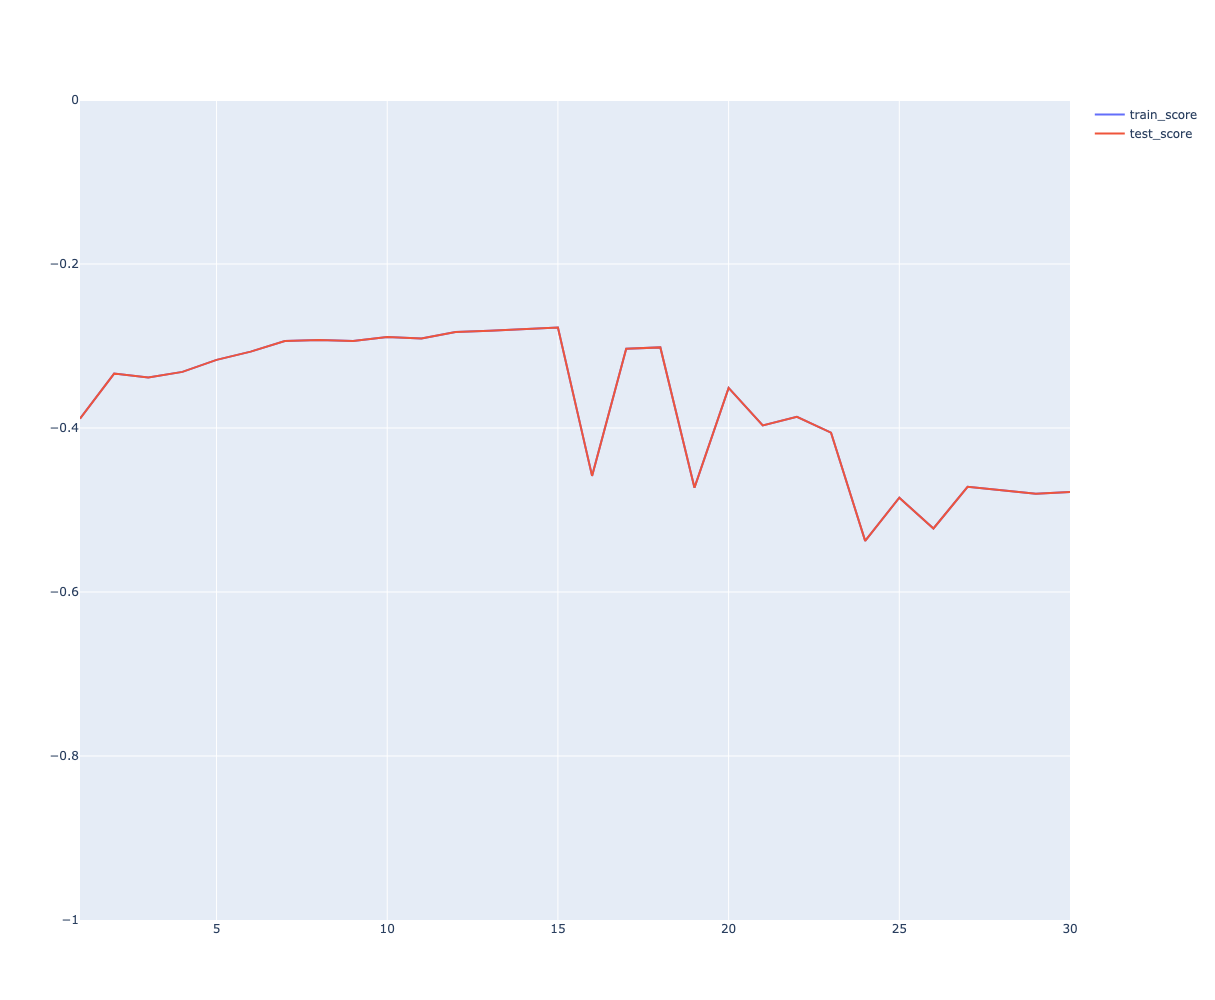

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=power_dies_df['poly'], y=power_dies_df['loss_train'], mode='lines', name='train_score'))
fig.add_trace(go.Scatter(x=power_dies_df['poly'], y=power_dies_df['loss_test'], mode='lines', name='test_score'))
fig.update_layout(width = 1200, height=1000, yaxis_range=[-1, 0])
#fig.write_html('ENGINE_VOL_DIESEL____loss_mae_test_VS_loss_mae_train.html')
fig.show()

**ПРОГОНИМ ТЕПЕРЬ С МЕТРИКОЙ MAPE**

In [20]:
power_dies_df_mape = pd.DataFrame({'poly': [], 'loss_train': [], 'loss_test': []})
for each in power:
    poly2 = PolynomialFeatures(each)
    x_polynom = poly2.fit_transform(X)
    regr2 = LinearRegression(fit_intercept=False)
    cross_val = cross_validate(regr2, x_polynom, Y, cv=5, return_train_score=True, scoring='neg_mean_absolute_percentage_error')
    power_dies_df_mape.loc[len(power_dies_df_mape.index)] = [each, np.mean(np.array(cross_val['train_score'])), np.mean(np.array(cross_val['train_score']))]
power_dies_df_mape

,poly,loss_train,loss_test
0,1.0,-6.762234,-6.762234
1,2.0,-6.438158,-6.438158
2,3.0,-6.994537,-6.994537
3,4.0,-6.691697,-6.691697
4,5.0,-5.728783,-5.728783
5,6.0,-4.800283,-4.800283
6,7.0,-4.378578,-4.378578
7,8.0,-4.267766,-4.267766
8,9.0,-4.622696,-4.622696
9,10.0,-4.358130,-4.358130


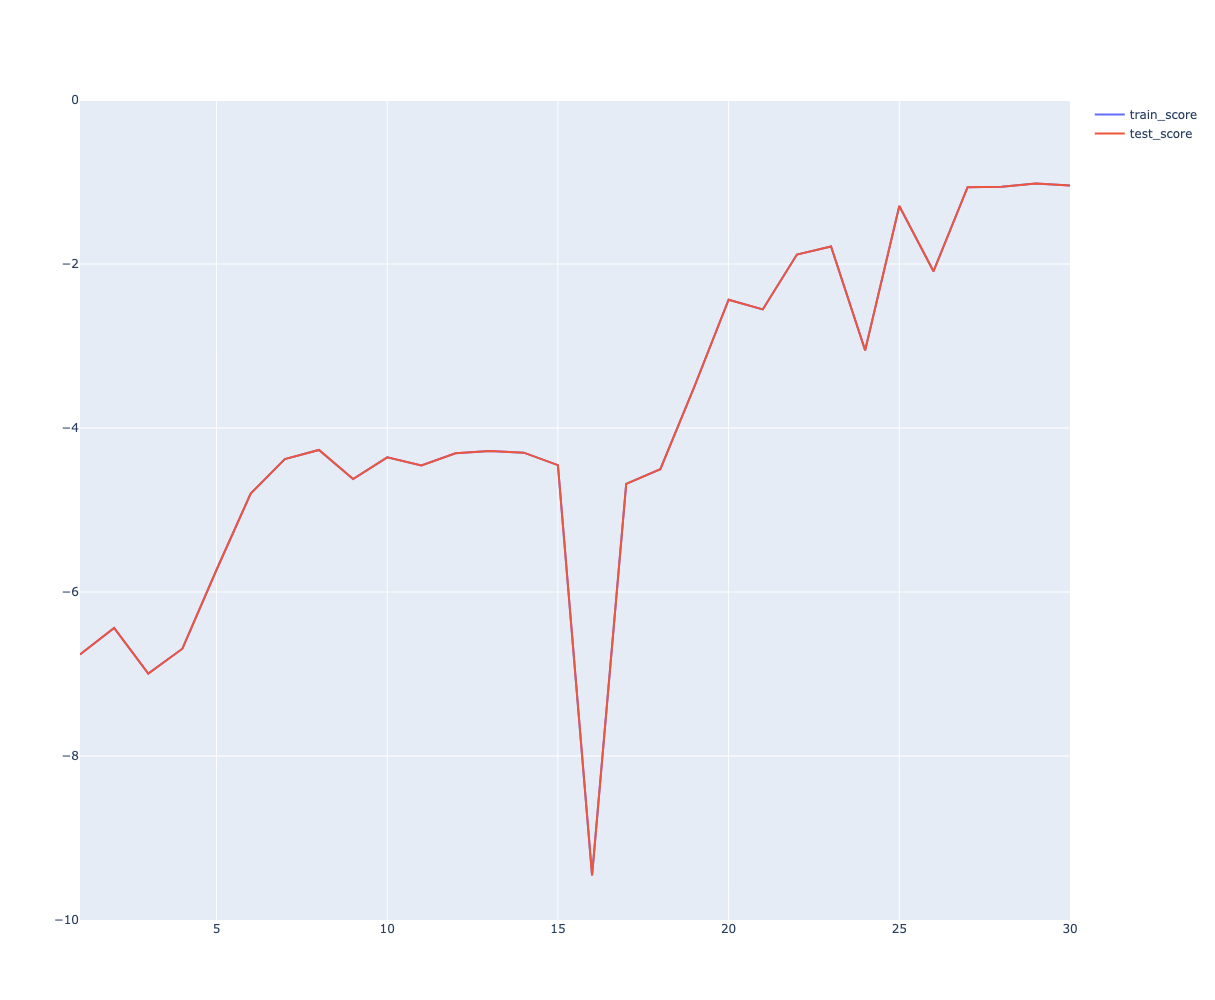

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=power_dies_df_mape['poly'], y=power_dies_df_mape['loss_train'], mode='lines', name='train_score'))
fig.add_trace(go.Scatter(x=power_dies_df_mape['poly'], y=power_dies_df_mape['loss_test'], mode='lines', name='test_score'))
fig.update_layout(width = 1200, height=1000, yaxis_range=[-10, 0])
#fig.write_html('ENGINE_VOL_DIESEL____loss_mae_test_VS_loss_mae_train.html')
fig.show()

# **КРУТЯЩИЙ МОМЕНТ, МОЩНОСТЬ И ТИП ТОПЛИВА**

In [41]:
processed_df = pd.read_csv('processed_df.csv')
processed_df = processed_df.dropna()

**ВЫДЕЛИМ ПРИЗНАКИ И ОТКЛИКИ И СКАЛЯРИЗУЕМ ИХ**

In [42]:
x = processed_df.loc[:, ['Diesel', 'max_power', 'torque']]
y = processed_df[['selling_price']]

**СКАЛЯРИЗУЕМ ПРИЗНАКИ И ОТКЛИКИ**

In [43]:
scaller = StandardScaler()
x_scld = scaller.fit_transform(x)
y_scld = scaller.fit_transform(y)

**ПРОАНАЛИЗИРУЕМ ЗАВИСИМОСТЬ СТЕПЕНИ ПОЛИНОМА ОТ РАЗНИЦЫ ОШИБОК, ДЛЯ ЭТОГО СОЗДАДИМ СПИСОК ПОЛИНОМОВ**

In [51]:
poly_pow = np.arange(1, 26, 1)

**МЕТРИКА MAE**

In [52]:
poly_losses_df = pd.DataFrame({'poly_power': [], 'train_loss': [], 'test_loss': []})
for each in poly_pow:
    print(each)
    poly_make = PolynomialFeatures(each)
    x_scld_poly = poly_make.fit_transform(x_scld)
    regres = LinearRegression(fit_intercept=False)
    regres.fit(x_scld_poly, y_scld)
    cross_val_results = cross_validate(regres, x_scld_poly, y_scld, cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
    poly_losses_df.loc[len(poly_losses_df.index)] = [each, np.mean(np.array(cross_val_results['train_score'])), np.mean(np.array(cross_val_results['test_score']))]
poly_losses_df

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


,poly_power,train_loss,test_loss
0,1.0,-0.389842,-3.906882e-01
1,2.0,-0.339690,-3.421263e-01
2,3.0,-0.335272,-3.443039e-01
3,4.0,-0.314143,-5.433458e-01
4,5.0,-0.311398,-1.042577e+01
5,6.0,-0.269764,-1.560927e+03
6,7.0,-0.266187,-4.936871e+05
7,8.0,-0.258094,-1.085277e+07
8,9.0,-0.305063,-8.757197e+07
9,10.0,-0.286797,-4.573827e+11


In [62]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=poly_losses_df['train_loss'], x=poly_losses_df['poly_power']))
fig.add_trace(go.Scatter(y=poly_losses_df['test_loss'], x=poly_losses_df['poly_power']))
fig.update_layout(yaxis_range=[-5, 0])
fig.write_html('Engine_Power_Torque__train_VS_test__poly.html')

**КАК ВИДНО ИЗ ГРАФИКА ПРИ ПОЛИНОМЕ СТЕПЕНИ 3 ОПТИМАЛЬНЫЕ ПОТЕРИ**